In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_30377/3130060226.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'seaborn'

### INFORMACIÓN BÁSICA DATASET

In [3]:
messi = pd.read_csv('messi_tweets.csv')

In [4]:
messi.shape

(39267, 16)

In [5]:
messi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39267 entries, 0 to 39266
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                39267 non-null  int64 
 1   user_name         39267 non-null  object
 2   user_location     26597 non-null  object
 3   user_description  35749 non-null  object
 4   user_created      39267 non-null  object
 5   user_followers    39267 non-null  int64 
 6   user_friends      39267 non-null  int64 
 7   user_favourites   39267 non-null  int64 
 8   user_verified     39267 non-null  bool  
 9   date              39267 non-null  object
 10  text              39267 non-null  object
 11  hashtags          30892 non-null  object
 12  source            39267 non-null  object
 13  retweets          39267 non-null  int64 
 14  favorites         39267 non-null  int64 
 15  is_retweet        39267 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 4.3+ MB


In [6]:
messi.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,3.926700e+04,3.926700e+04,39267.000000,3.926700e+04,39267.000000,39267.000000
mean,1.426774e+18,1.831707e+04,991.184150,1.135239e+04,4.461507,30.218148
std,3.274325e+15,3.805292e+05,3152.665691,3.258829e+04,297.865672,1443.203960
min,1.424340e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.424655e+18,4.200000e+01,98.000000,2.530000e+02,0.000000,0.000000
50%,1.425200e+18,2.130000e+02,314.000000,1.969000e+03,0.000000,1.000000
75%,1.426562e+18,1.184500e+03,1032.500000,1.126400e+04,0.000000,2.000000
max,1.436061e+18,3.765677e+07,268510.000000,1.210174e+06,53283.000000,196750.000000


In [7]:
messi.describe(exclude='number')

,user_name,user_location,user_description,user_created,user_verified,date,text,hashtags,source,is_retweet
count,39267,26597,35749,39267,39267,39267,39267,30892,39267,39267
unique,21745,7102,20131,22099,2,36819,39107,11846,150,1
top,Nigeria News PR notice.com.ng,"Lagos, Nigeria","we will bring you sparkling latest news, lates...",2019-02-25 06:12:29,False,2021-08-08 12:44:09,@PSG_inside https://t.co/sfeHbhksnT #Messi #PS...,['Messi'],Twitter for Android,False
freq,2143,2462,2143,2143,38118,5,15,7444,16863,39267


In [8]:
messi.nunique(axis=0)

id                  39267
user_name           21745
user_location        7102
user_description    20131
user_created        22099
user_followers       5266
user_friends         3879
user_favourites     12271
user_verified           2
date                36819
text                39107
hashtags            11846
source                150
retweets              155
favorites             402
is_retweet              1
dtype: int64

### NULOS

In [9]:
contador = 0
for nulo in messi.isnull().sum():
    if nulo > 0:
        print(f'{messi.columns[contador]}: {nulo} => {round(nulo/len(messi) * 100, 2)}%')
    contador += 1

user_location: 12670 => 32.27%
user_description: 3518 => 8.96%
hashtags: 8375 => 21.33%


In [10]:
#Dropear estas columnas porque aumentan la carga de nulos del dataset

messi.drop('hashtags', inplace=True, axis=1)
messi.drop('user_description', inplace=True, axis=1)

In [11]:
print(f'Porcentaje nulos => {round(len(messi[messi.isnull().any(axis=1)]) / len(messi) * 100, 2)}%')

Porcentaje nulos => 32.27%


##### Columna 'user_location'

In [12]:
messi['user_location'].mode()

0    Lagos, Nigeria
Name: user_location, dtype: object

Rellenamos la ubicación de un Usuario con una ubicación que haya utilizado anteriorment (en caso de que nunca haya puesto una ubicación quedara en Nulo)

In [13]:
import random as rdm

for indice, row in messi[messi['user_location'].isnull()].iterrows():
    location = row['user_location']
    user_name = row['user_name']

    location_not_null = messi[(messi['user_name'] == user_name) & messi['user_location'].notnull()]['user_location'].unique()

    if str(location) == 'nan' and len(location_not_null) > 0: messi.loc[indice, 'user_location'] = rdm.choice(location_not_null)

In [14]:
contador = 0
for nulo in messi.isnull().sum():
    if nulo > 0:
        print(f'{messi.columns[contador]}: {nulo} => {round(nulo/len(messi) * 100, 2)}%')
    contador += 1

user_location: 12016 => 30.6%


##### Drop nulos

In [15]:
messi.shape[0] - messi.dropna().shape[0]

12016

In [16]:
messi.dropna(inplace=True)

In [17]:
round(len(messi[messi.isnull().any(axis=1)]) / len(messi) * 100, 2)

0.0

### DUPLICADOS

In [18]:
print(f'Total de filas duplicadas: {messi.duplicated().sum()}')

Total de filas duplicadas: 0


En este caso los outliers no se deben a errores. 

In [19]:
#Guardamos el dataset limpio
messi.to_csv('messi_cleaned.csv', index=False)

In [20]:
numCol = messi.select_dtypes(include=['number']).columns.to_list()
numCol.remove('id')

catCol = messi.select_dtypes(include=['object']).columns.to_list()

### ANÁLISE DOS VALORES CATEGÓRICOS

In [21]:
messi = pd.read_csv('messi_cleaned.csv')

In [22]:
print(f'Variables categóricas: {catCol}')

Variables categóricas: ['user_name', 'user_location', 'user_created', 'date', 'text', 'source']


In [23]:
messi_cat = messi[catCol]

In [24]:
filas = []

for d in messi_cat['date'].to_list():
    f, h = d.split()
    filas.append([f, h])

messi_cat = messi_cat.join(pd.DataFrame(filas, columns=['dates', 'hours']))
messi_cat = messi_cat.drop(['date'], axis=1)

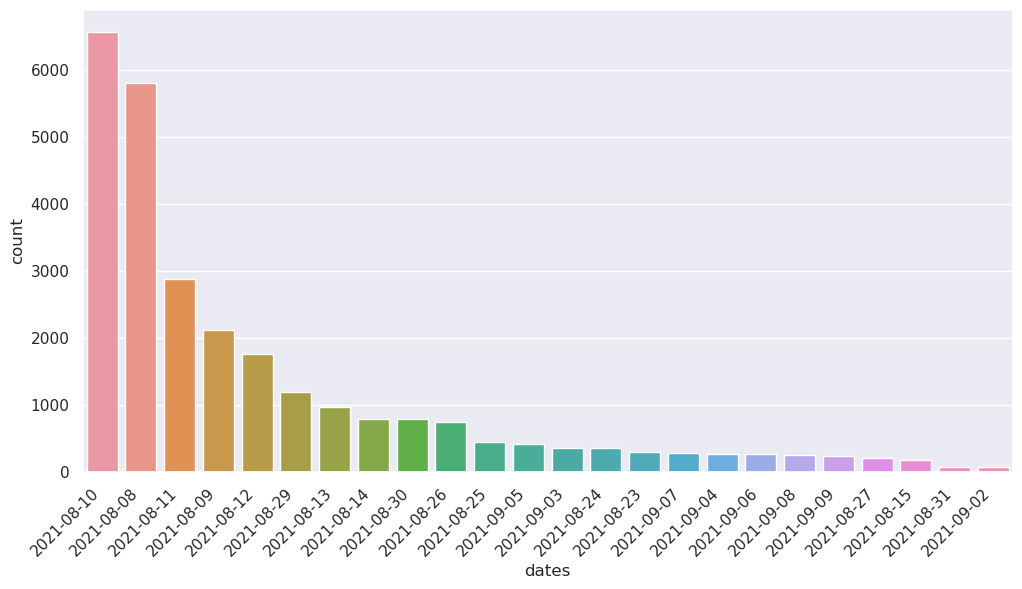

In [25]:
plt.figure(figsize=(12, 6))  
sns.set_theme(style='darkgrid')

sns.countplot(data=messi_cat, x='dates', order=messi_cat['dates'].value_counts().index)

plt.xticks(rotation=45, ha='right')  
plt.show()


In [26]:
hola = '2021-08-10'

contador = 0
for t in messi[messi_cat['dates'] == hola]['text'].to_list():
    print(f'Usuario => {messi['user_name'][contador]}:')
    print(t)
    print()
    contador += 1

Usuario => Patrick Onjeh:
So we are lucky enough to see these 🐐 and live in this era😍❤️. #ViratKohli #Abd #Messi #Ronaldo #.....list goes ona… https://t.co/dMRUPFINvi

Usuario => Ajay:
🐐 Guess who's back... 
👑 Back again... 
🐐 #Messi's back... 
👑 Tell a friend 

🔵🔴 #ForçaBarça

Usuario => IG - #MrInfluencerUg_ 🇺🇬 🇳🇬 🇿🇦:
can't #Messi play for Barca B?

Usuario => IG - #MrInfluencerUg_ 🇺🇬 🇳🇬 🇿🇦:
Don't Torture Barca Fans again. 
#Messi #MessiQuedate #MessiForever #LaLiga #psg https://t.co/rK0iWBIy9W

Usuario => Matthew Moats:
#BREAKING #BreakingNews 
🚨 ⚽️ After a stop last night in Ibiza, #Messi’s jet 🛩 is now heading to #Argentina 🇦🇷 

Le… https://t.co/1lh9zxYB85

Usuario => Malanga News Sports 45:
He is the goat however, he is still a human 
#messi #football #Transfers https://t.co/LmqYKiShas

Usuario => IG - #MrInfluencerUg_ 🇺🇬 🇳🇬 🇿🇦:
PSG open to selling 10 stars to cut their £26M wage bill with #Messi set to join.
#MessiQuedate https://t.co/BTZcaWWUKx

Usuario => Ross Edmonds:
#Messi 

Es el día que mas se tweeteo sobre Messi porq se anunciaba su retirada del Barça.

/home/xuwira31/miniconda3/envs/EDA/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78249 (\N{EGYPTIAN HIEROGLYPH L006}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/xuwira31/miniconda3/envs/EDA/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78250 (\N{EGYPTIAN HIEROGLYPH L006A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/xuwira31/miniconda3/envs/EDA/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/xuwira31/miniconda3/envs/EDA/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/xuwira31/miniconda3/envs/EDA/lib/python3.12/site-packages/IPython/core/pylabtools.py:15

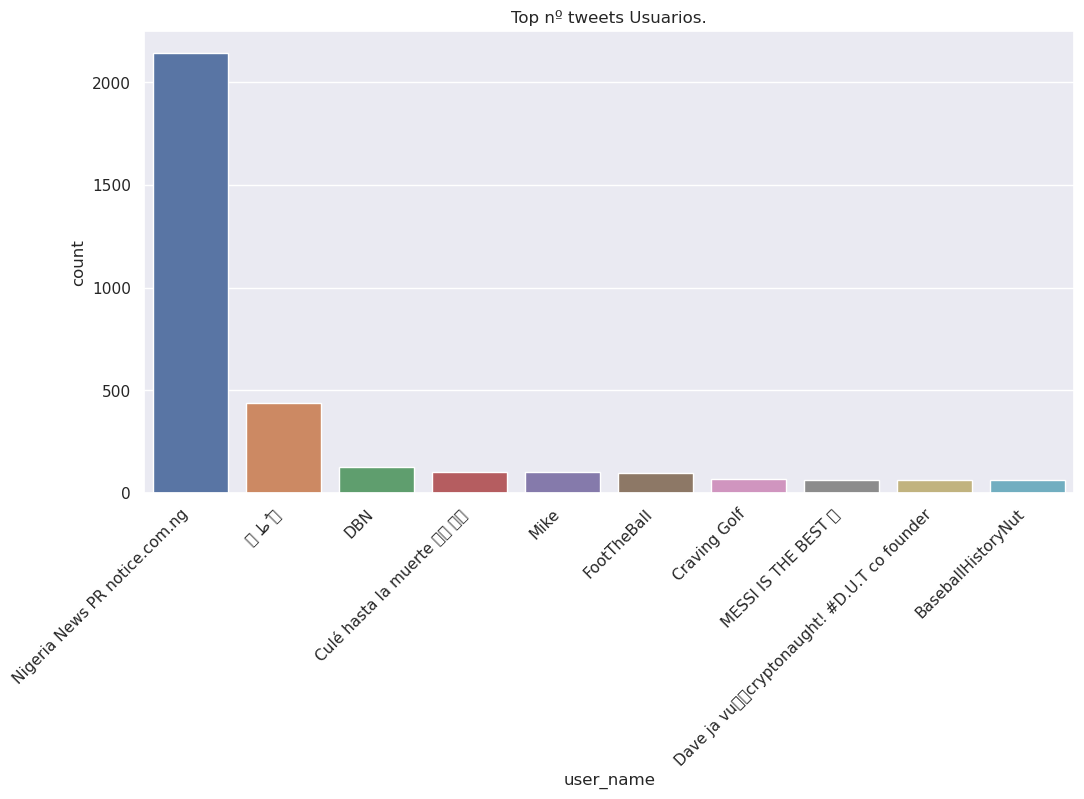

In [30]:
plt.figure(figsize=(12, 6))  
sns.set_theme(style='darkgrid')

top_names = messi_cat['user_name'].value_counts().head(10).index
sns.countplot(data=messi_cat, x='user_name', order=top_names)

plt.title('Top nº tweets Usuarios.')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [ ]:
num_rows, num_cols = messi.shape
for i,cat in enumerate(messi_cat.drop(['text'], axis=1).columns):
    val_counts = messi_cat[cat].value_counts()
    dominant_frac = val_counts.iloc[0] / num_rows
    print(f'`{val_counts.index[0]}` => {round(dominant_frac * 100, 2)}% de {cat}.')

`Nigeria News PR notice.com.ng` => 7.86% de user_name.
`Lagos, Nigeria` => 9.03% de user_location.
`2019-02-25 06:12:29` => 7.86% de user_created.
`Twitter for Android` => 41.3% de source.
`2021-08-10` => 24.11% de dates.
`02:00:00` => 0.04% de hours.


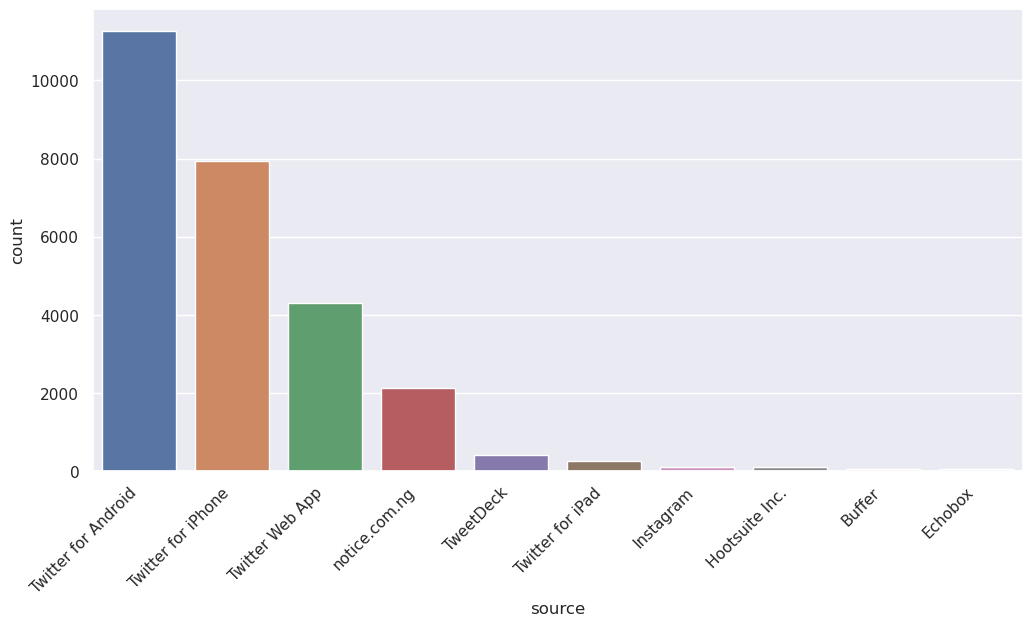

In [ ]:
plt.figure(figsize=(12, 6)) 
sns.set_theme(style='darkgrid')

source_counts = messi_cat['source'].value_counts()

top_sources = source_counts.head(10).index

sns.countplot(data=messi_cat, x='source', order=top_sources)

plt.xticks(rotation=45, ha='right')  
plt.show()


Podemos observar que un gran número de los usuarios has tweeteado desde un Android.

### ANÁLISE DOS VALORES NUMÉRICOS

*Correlaciones:*

In [ ]:
messi_num = messi[numCol]

In [ ]:
corr_matrix = messi_num.corr()
corr_matrix

,user_followers,user_friends,user_favourites,retweets,favorites
user_followers,1.000000,0.001549,-0.010906,0.162592,0.259641
user_friends,0.001549,1.000000,0.260841,0.001115,0.001174
user_favourites,-0.010906,0.260841,1.000000,-0.002005,-0.002406
retweets,0.162592,0.001115,-0.002005,1.000000,0.924966
favorites,0.259641,0.001174,-0.002406,0.924966,1.000000


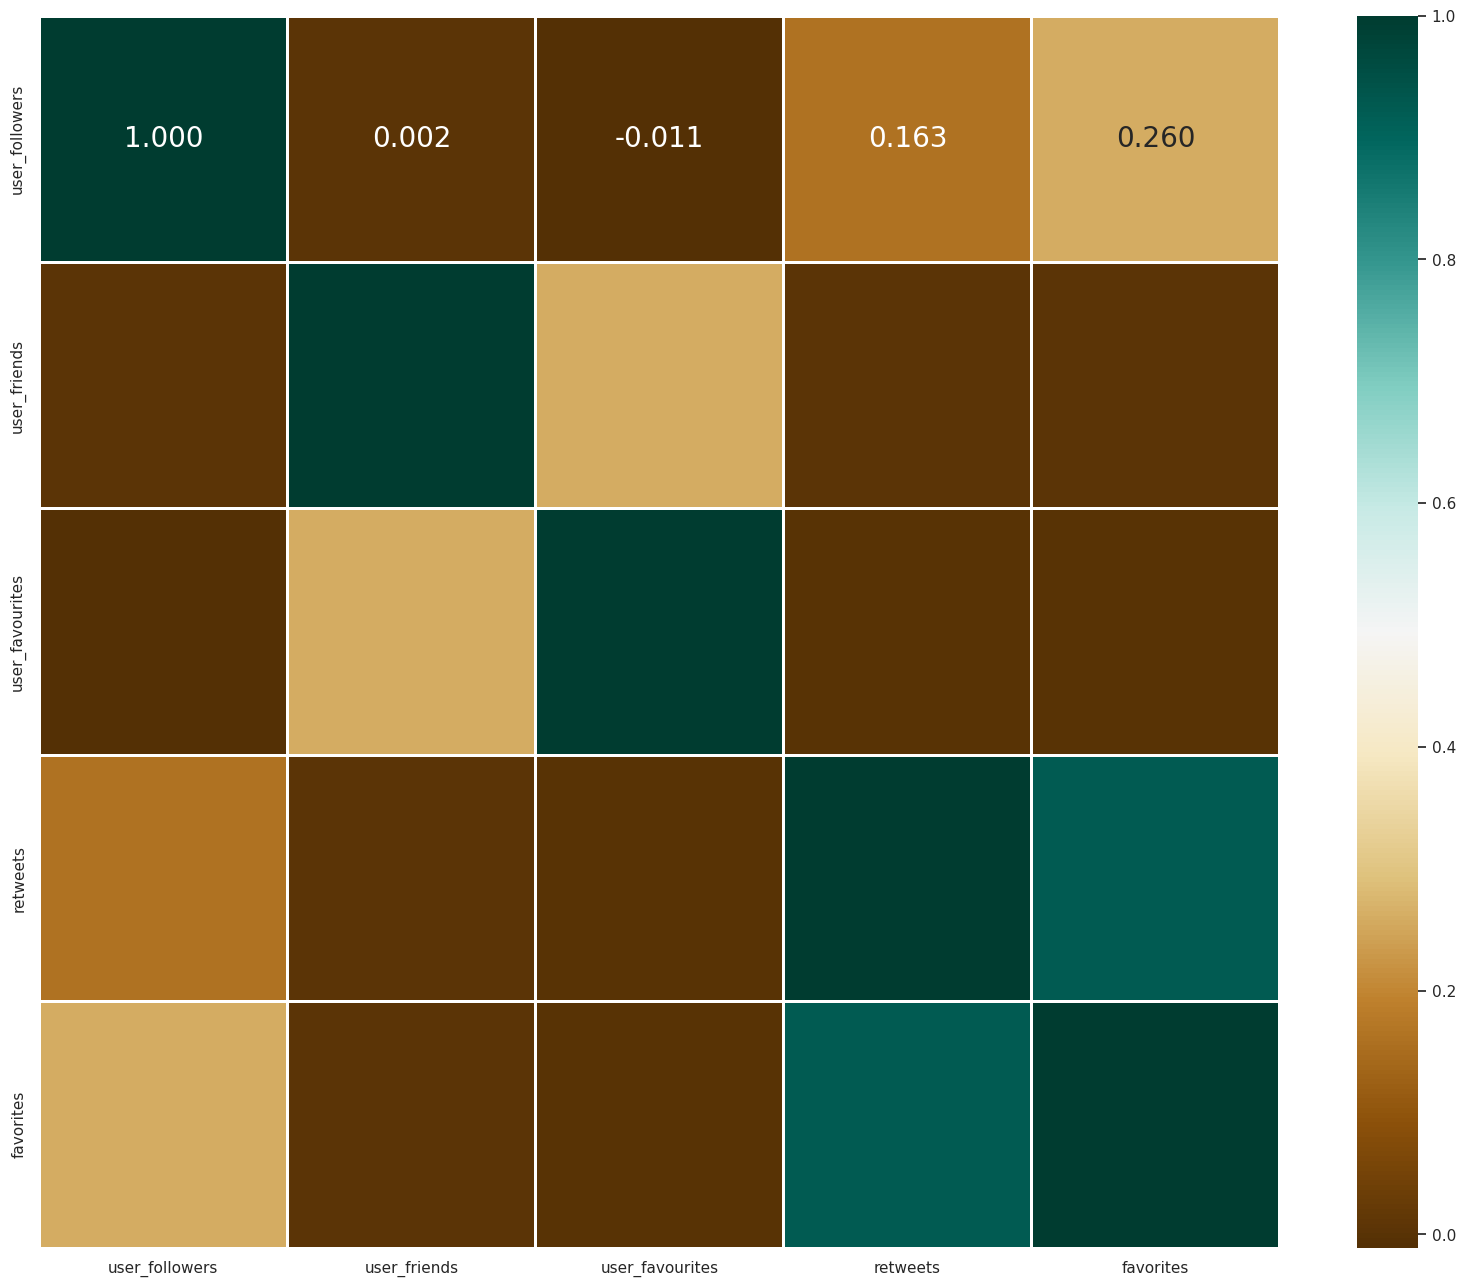

In [ ]:
plt.figure(figsize=(20, 16))

sns.heatmap(corr_matrix, linewidths=2, annot=True, fmt=".3f", cmap="BrBG", annot_kws={"size": 20})

plt.show()

Hay una correlacion muy baja entre todo excepto entre retweets y favoritos que suelen ir de la mano.

*OUTLIERS:*

In [ ]:
def tukey_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers

In [ ]:
messi_sin_outliers = messi.copy()

for c in numCol:
    Q1 = messi[c].quantile(0.25)
    Q3 = messi[c].quantile(0.75)
    IQR = Q3 - Q1
    BI = (Q1 - 1.5 * IQR)
    BS = (Q3 + 1.5 * IQR)

    outliers = messi[(messi[c] < BI) | (messi[c] > BS)]
    perc_outliers = len(outliers) * 100.0 / len(messi)

    print(f'{c}: {len(outliers)} => {round(perc_outliers, 2)}%')
    messi_sin_outliers = messi_sin_outliers[(messi_sin_outliers[c] >= BI) & (messi_sin_outliers[c] <= BS)]

print(f'\n{round((len(messi) - len(messi_sin_outliers)) / len(messi) * 100, 2)}% filas con outliers en el df.')

user_followers: 2860 => 10.5%
user_friends: 1693 => 6.21%
user_favourites: 2969 => 10.9%
retweets: 6427 => 23.58%
favorites: 3483 => 12.78%

38.14% filas con outliers en el df.
